## DS 7337: Natural Language Processing

## Jaclyn Coate
## Homework 2

#### Spring 2021
#### Natural Language Processing w/ Python: Bird, Klein, & Loper

In [1]:
# Prep the environment with necessary libraries
import nltk
import matplotlib as plt
import os
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.preprocessing import minmax_scale
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [2]:
#### Normalization method to obtain the Vocabulary Size and then to normalize the Vocabulary Size score
def n_vocab_size(*arg):
    vocab_size = np.array([])
    vocab_size_norm = np.array([])
    
    #### Obtaining the Vocabulary Size
    for text in arg:
        vocab_size = np.append(vocab_size,len(set(text)))
    
    #### Normalize the Vocabulary Size using Normalization Formula
    for vsize in vocab_size:
        vocab_size_norm = np.append(vocab_size_norm,(vsize - vocab_size.min()) /
                                                    (vocab_size.max() - vocab_size.min()))
    
    #### Normalizing using sklearn pre-processing 
    vocab_size_norm_sklearn = minmax_scale(vocab_size, feature_range=(0,1), axis=0)
    
    return(vocab_size,vocab_size_norm,vocab_size_norm_sklearn)

##### HW 2: Question 1
In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

- In order to move forward I will leverage the instructor provided code for normalization. Below I have used the sklearn and manual normalization formula to compare the difference. 
     - The pre-processing above allows us to scale all the data by text length. After identifying the unique tokens in a text and measuring by lengths of text ranging from 0 to 1. The longer unique tokens falling closer to 1 and vice versa for shorter unique tokens.
     - Upon the execution of both methods I see that the difference between the normalization only shows a difference to the 16th decimal place. :) Therefore, I will move forward with the sklearn method as there is no dicernable difference between the two. 

In [3]:
#### Importing and normalizing same text from HW1
#carroll
string1=open('/Users/Jaco/Desktop/SMU/DS_7337_Natural_Language_Processing/Datasets/carroll.txt')
raw1=string1.read()
tokens1 = nltk.word_tokenize(raw1)
carroll = nltk.Text(tokens1)

#twain
string2=open('/Users/Jaco/Desktop/SMU/DS_7337_Natural_Language_Processing/Datasets/twain.txt')
raw2=string2.read()
tokens2 = nltk.word_tokenize(raw2)
twain = nltk.Text(tokens2)

#kipling
string3=open('/Users/Jaco/Desktop/SMU/DS_7337_Natural_Language_Processing/Datasets/kipling.txt')
raw3=string3.read()
tokens3 = nltk.word_tokenize(raw3)
kipling = nltk.Text(tokens3)

In [4]:
vocab_size = n_vocab_size(carroll,twain,kipling)

In [5]:
type(vocab_size)

tuple

In [6]:
print("Normalized Values by Using Normalization Formula", *vocab_size[1],sep='\n- ')

Normalized Values by Using Normalization Formula
- 0.0
- 1.0
- 0.3983600305110603


In [7]:
print("Normalized Values by Using Sklearn", *vocab_size[2],sep='\n- ')

Normalized Values by Using Sklearn
- 0.0
- 1.0
- 0.3983600305110604


##### Chapter 1: 3.1 Frequency Distributions

The table in 3.1 is known as a frequency distribution, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
#Frequency Distribution: Moby Dick
## When we first invoke FreqDist, we pass the name of the text as an argument
fdist1 = FreqDist(text1)
## We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. 
print(fdist1)

# Finding the most commonly used words
## The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3].
fdist1.most_common(50)

# Discovering the frequency of a word in text
fdist1['whale']

<FreqDist with 19317 samples and 260819 outcomes>


906

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, whale, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using fdist1.plot(50, cumulative=True), to produce the graph in 3.2. These 50 words account for nearly half the book!

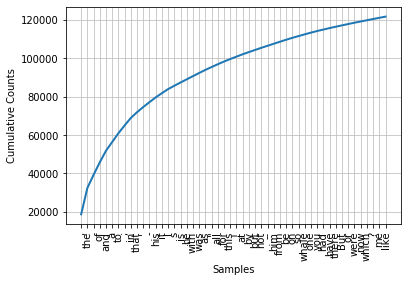

In [10]:
#Cumulativs counts of top 50 occuring words
fdist1.plot(50, cumulative=True)

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing fdist1.hapaxes(). This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [11]:
#Identifying those words that occur only once
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


##### Chapter 1: 3.2 Frequency Distributions

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property P, so that P(w) is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all w such that w is an element of V (the vocabulary) and w has property P".

For each word w in the vocabulary V, we check whether len(w) is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later.

In [12]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [13]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.

##### HW 2: Question 2
After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

- From 3.2 in the book we learn about frequency distribution and below are our frequency distributions.

In [14]:
#Frequency distribution of texts from HW 1
carroll_frequdist = FreqDist(carroll)
print(carroll_frequdist)
twain_frequdist = FreqDist(twain)
print(twain_frequdist)
kipling_frequdist = FreqDist(kipling)
print(kipling_frequdist)

<FreqDist with 4027 samples and 42823 outcomes>
<FreqDist with 9271 samples and 91364 outcomes>
<FreqDist with 6116 samples and 65189 outcomes>


- Evaluating the long words by text I discover Carroll has lots of websites. So in order to drop these I set to 14 and see what happens.

In [15]:
V = set(carroll)
c_long_words = [w for w in V if len(w) > 15]
sorted(c_long_words)

['//gutenberg.org/license',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 '//www.gutenberg.org',
 '//www.gutenberg.org/1/12/',
 'Bread-and-Butterfly',
 'Bread-and-butter',
 'Rocking-horse-fly',
 'Snap-dragon-flies',
 'bread-and-butter',
 'fellow-traveller',
 'knitting-needles',
 'ninety-times-nine',
 'thirty-times-three',
 'trademark/copyright',
 'twopence-halfpenny',
 'unenforceability',
 'waistcoat-buttons',
 'www.gutenberg.org']

- Leveraging what was learned in 3.2 I call all words that ocurr at least more than twice and longer than 7 characters to find more meaningful words in the text.

In [16]:
sorted(w for w in set(carroll) if len(w) > 7 and carroll_frequdist[w]>0)

#fdist5 = FreqDist(text5)
#sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['.ebargtuo',
 '//gutenberg.org/license',
 '//pglaf.org',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 '//www.gutenberg.org',
 '//www.gutenberg.org/1/12/',
 '//www.pglaf.org',
 '12-0.txt',
 '12-0.zip',
 '596-1887',
 '64-6221541',
 'A-SITTING',
 'A-sitting',
 'AGREEMENT',
 'ANYTHING',
 'Addition',
 'Additional',
 'Anglo-Saxon',
 'BALANCES',
 'BOROGOVE',
 'BROILING',
 'Bandersnatch',
 'Be-e-e-etter',
 'Be-e-ehh',
 'Be-etter',
 'Bough-wough',
 'Bread-and-Butterfly',
 'Bread-and-butter',
 'Butterfly',
 'CARPENTER',
 'CONSEQUENTIAL',
 'CONTRACT',
 'Carpenter',
 'Certainly',
 'Character',
 'Children',
 'Christmas',
 'Completed',
 'Compliance',
 'Consider',
 'Contrariwise',
 'Contrariwise.',
 'Contributions',
 'Conveniently',
 'Copyright',
 'Crawling',
 'Creating',
 'DISCLAIMER',
 'DISTRIBUTE',
 'DISTRIBUTOR',
 'DONATIONS',
 'Director',
 'Division',
 'Donations',
 'Dragon-fly.',
 'Dreaming',
 'EVERYTHING',
 'Everybody',
 'Everything',
 'Evidently',
 'Executive',
 'FOUNDATION',
 'Fairba

- Leveraging the sklearn package I am now normalizing the long_word by text in the below function.

In [17]:
#### Method to get the Long word size and normalize the score 0 to 1

def longwords_count(*arg):
    longword_size = np.array([])
    
    #### Getting the Long Word Stats
    for text in arg:
        longwords = [w for w in set(text) if len(w) > 15]
        longword_size = np.append(longword_size,len([w for w in set(text) if len(w) > 15]))
    
    #### Normalizing using sklearn preprocessing 
    longwords_norm_sklearn = minmax_scale(longword_size, feature_range=(0,1), axis=0)
    return(longwords_norm_sklearn)

longwords_norm_bytext = longwords_count(carroll,twain,kipling)

print(longwords_norm_bytext)

[0. 1. 0.]


##### HW 2: Question 3
Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

- Below I bring back those normalized scores across Word Size, Lexical Diversity, and the Long Word Score we just created.

In [18]:
#Word size normalization
print("Normalized Values by Using Normalization Formula", 
      *vocab_size[1],sep='\n- ')

Normalized Values by Using Normalization Formula
- 0.0
- 1.0
- 0.3983600305110603


In [19]:
#Lexical diversity calculation based on Unit 1 HW
def lexical_diversity(txt):
    return len(set(txt)) / len(txt)

In [20]:
ldcarroll = lexical_diversity(carroll)
print(ldcarroll)
ldtwain = lexical_diversity(twain)
print(ldtwain)
ldkipling = lexical_diversity(kipling)
print(ldkipling)

0.09403825047287673
0.10147322796725187
0.09381950942643698


In [21]:
#Long word normalization scores in Carrol, Twain, Kipling order
print(longwords_norm_bytext)

[0. 1. 0.]


- Here I have pulled together those different scores in a single function.

In [22]:
def textdifficulty(*arg):
    longword_size = np.array([])
    lexdiv = np.array([])
    vocab_size = np.array([])
    
    #Here we identify each of the items above and what they are composed of
    for text in arg:
        longword_size = np.append(longword_size,len([w for w in set(text) if len(w) > 15]))
        lexdiv = np.append(lexdiv, lexical_diversity(text))
        vocab_size = np.append(vocab_size, len(set(text)))
    
    #Then we normalize each of those scores using sklearn
    longwords_norm = minmax_scale(longword_size, feature_range=(0,1), axis=0)
    lexdiv_norm = minmax_scale(lexdiv, feature_range=(0, 1), axis=0)
    vocab_size_norm = minmax_scale(vocab_size, feature_range=(0, 1), axis=0)

    return(longwords_norm, lexdiv_norm, vocab_size_norm)

- Running above function on my three texts and printing out the funtion results from each text in a more organized way:

In [23]:
textscores = textdifficulty(carroll,twain,kipling)

In [24]:
print("Carroll ","\n","Long Word Score: ",textscores[0][0],"\n",
      "Lexical Diversity: ",textscores[1][0],"\n", "Vocab Size:", textscores[2][0],"\n")

print("Twain ","\n","Long Word Score: ",textscores[0][1],"\n",
      "Lexical Diversity: ",textscores[1][1],"\n", "Vocab Size:", textscores[2][1],"\n")

print("Kipling","\n","Long Word Score: ",textscores[0][2],"\n",
      "Lexical Diversity: ",textscores[1][2],"\n", "Vocab Size:", textscores[2][2],"\n")

Carroll  
 Long Word Score:  0.0 
 Lexical Diversity:  0.028579708709337126 
 Vocab Size: 0.0 

Twain  
 Long Word Score:  1.0000000000000002 
 Lexical Diversity:  1.0 
 Vocab Size: 1.0 

Kipling 
 Long Word Score:  0.0 
 Lexical Diversity:  0.0 
 Vocab Size: 0.3983600305110604 



- Summing the scores across the three to create a text difficulty score

In [25]:
#Summed Score
print("Carroll","\n","Difficulty Score: ",
      sum([textscores[0][0],textscores[1][0],textscores[2][0]]),"\n")

print("Twain","\n","Difficulty Score: ",
      sum([textscores[0][1],textscores[1][1],textscores[2][1]]),"\n")

print("Kipling","\n","Difficulty Score: ",
      sum([textscores[0][2],textscores[1][2],textscores[2][2]]),"\n")

Carroll 
 Difficulty Score:  0.028579708709337126 

Twain 
 Difficulty Score:  3.0 

Kipling 
 Difficulty Score:  0.3983600305110604 

